In [ ]:
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
   
    dftest = adfuller(series, autolag="aic") #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data. 
    #T is simply the calculated difference represented in units of standard error. 
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','No Lags used','No of Observations used'])
    mx=999999
    for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value 
      if value <= mx:
        mx =value
    print (dfoutput)
    if dftest[1] <= 0.05 and dftest[0]<value:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
    return series

FB Dataset

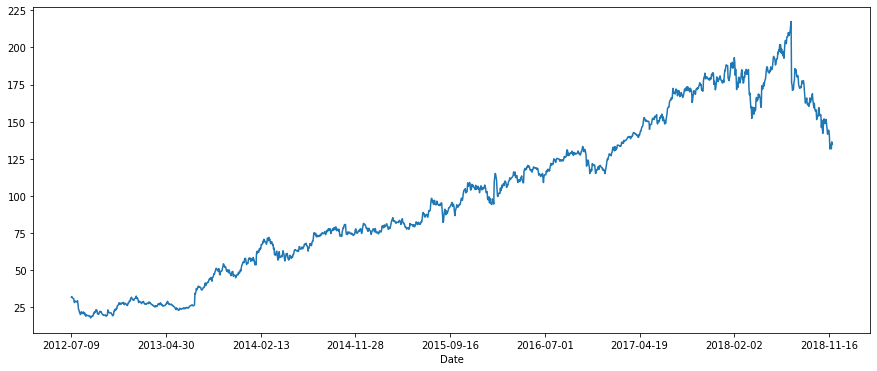

In [ ]:
series = pd.read_csv(r'FB.csv', header=0, index_col=0)
series['Close'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
df=Augmented_Dickey_Fuller_Test_func(series['Close'],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic               -1.159171
P-Value                       0.690908
No Lags used                  5.000000
No of Observations used    1602.000000
Critical Value (1%)          -3.434439
Critical Value (5%)          -2.863346
Critical Value (10%)         -2.567731
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


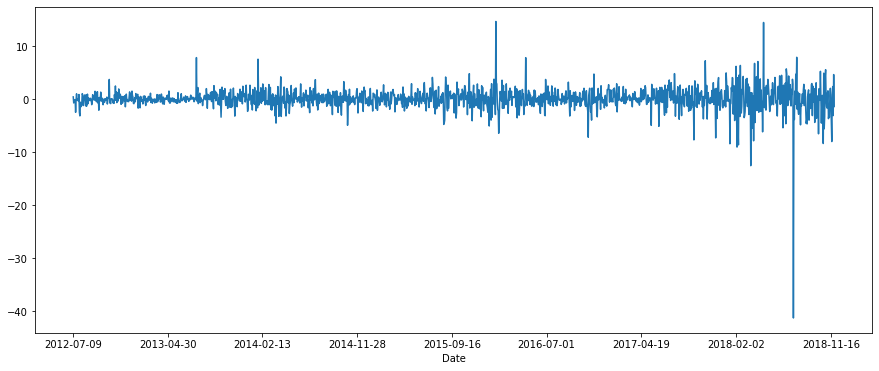

In [ ]:
df.plot(figsize=(15,6))

Own Dataset :: temp.csv

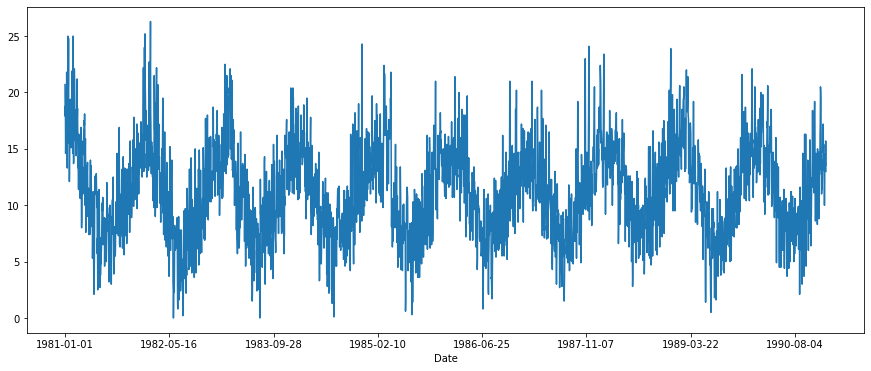

In [ ]:
series = pd.read_csv(r'temp.csv', header=0, index_col=0)
series['Temp'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
df=Augmented_Dickey_Fuller_Test_func(series,'Temp')

Results of Dickey-Fuller Test for column: Temp
Test Statistic               -4.444805
P-Value                       0.000247
No Lags used                 20.000000
No of Observations used    3629.000000
Critical Value (1%)          -3.432153
Critical Value (5%)          -2.862337
Critical Value (10%)         -2.567194
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


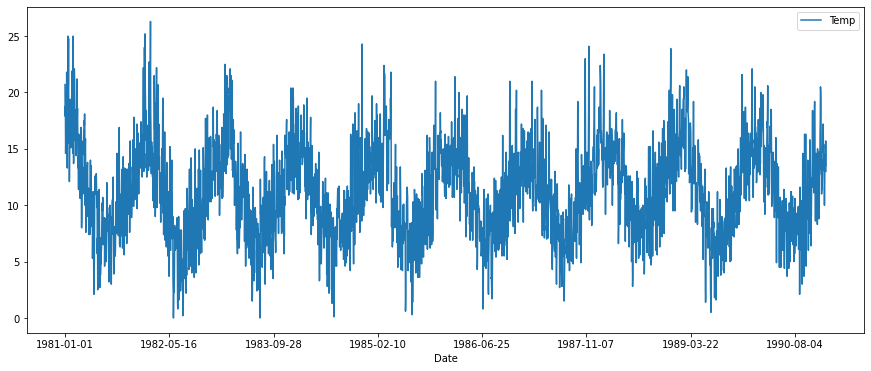

In [ ]:
df.plot(figsize=(15,6))